In [1]:
# sim_based_maping
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
from gensim.models import Word2Vec

class sim_based_maping():
    def __init__(self,df):
        self.energy = ['기운','기력','원기','기','활력','정기'] # 에너지
        self.recovery = ['치유','처지','약','완화','진통','쉬다'] # 회복
        self.cycle = ['순환','심장','신장','소화','배출','분비'] # 순환
        self.pury = ['정화','독','해독','없애다','삭히다','그치다'] # 정화        
        self.wiki_model = Word2Vec.load('./ko/ko.bin')
        self.font = 'Malgun Gothic'  # for window
        # self.font = 'NanumGothic' # for linux
        self.df = df
        
    def processing(self,i):
        sent = self.df.iloc[i][1]
        morps = Okt().pos(sent , norm=False , stem = True)
        NV = []
        for item , morp in morps:
            if morp == 'Verb' or morp == 'Noun': 
                NV.append(item)

        stop_words = "하다 등 되다 작용 효능  것 사용 약재 응용 주로 그 때문 경우 및 동시 각종 자주 요약 이외 모든 로서 또 동의보감 예전 이름 기록 뿐 약간 한의학 자다 때 "
        stop_words = stop_words.split(" ")

        sNV = []
        for morp in NV:
            if not morp in stop_words:
                sNV.append(morp)
        sNV = np.unique(sNV)
        return sNV

    def check_test(self,idx):
        keyword = self.df.iloc[idx][0]
        sNV = self.processing(idx)
        print(f'keyword  : {keyword }')
        print(self.df.iloc[idx][1])
        print(f'energy   : {self.energy}')
        print(f'recovery : {self.recovery}')
        print(f'cycle    : {self.cycle}')
        print(f'pury     : {self.pury}') 
        print(f'str      : {sNV}')

    def result(self,idx, top , dis):
        dims = [self.energy, self.recovery, self.cycle, self.pury]
        sNV = self.processing(idx)
        result = []
        for dim in dims:
            sub = []
            for sim_word in dim:
                for word in sNV:
                    try:
                        sub.append(self.wiki_model.wv.similarity(sim_word , word))
                    except:
                        sub.append(0)
            tmp = np.sort(sub)[::-1][:top].mean()
            result.append(tmp)

        if dis == True:
            from matplotlib import rc
            plt.rc('font', family=self.font)

            word = self.df['emotion'][idx]
            label = ['에너지', '회복', '순환', '정화']

            plt.figure()
            plt.bar(np.arange(len(result)),result)
            plt.title(f'{word}\'s mapping for top {top} using synonyms')
            plt.xticks(np.arange(len(label)), label)
            plt.yticks(np.arange(0,1.2,0.2))
            plt.show()
        #std = np.var(result)
        #print(f'std is {std}')
        return result

    def distibution(self,idx):
        dims = [self.energy, self.recovery, self.cycle, self.pury]
        keyword = self.df.iloc[idx][0]
        sNV = self.processing(idx)
        
        result = []
        for dim in dims:
            sub = []
            for sim_word in dim:
                for word in sNV:
                    try:
                        sub.append(self.wiki_model.wv.similarity(sim_word , word))
                    except:
                        sub.append(0)
            plt.figure() 
            plt.scatter(np.arange(len(sub)) , sub , s=1)
            plt.title(f'{keyword} and {dim}')
            plt.show()
            result.append(sub)

    def heatmap_num(self,idx, dims, figsize):
        sNV = self.processing(idx)
        item = self.df.iloc[idx][0]
        
        result = []
        for dim in dims:
            sub = []
            for word in sNV:
                try:
                    sub.append(self.wiki_model.wv.similarity(dim , word))
                except:
                    sub.append(0)
            result.append(sub)

        plt.rc('font', family=self.font)
        fig = plt.figure(figsize=figsize)
        fig.set_facecolor('white')
        plt.title(f'\'{item}\'과 문장간의 heatmap')
        sns.heatmap(result,annot=True)
        plt.xticks(np.arange(len(sNV)),sNV)
        plt.yticks(np.arange(len(dims)),dims)
        plt.show()
        
    def heatmap(self,idx, dims, figsize):
        sNV = self.processing(idx)
        item = self.df.iloc[idx][0]
        
        result = []
        for dim in dims:
            sub = []
            for word in sNV:
                try:
                    sub.append(self.wiki_model.wv.similarity(dim , word))
                except:
                    sub.append(0)
            result.append(sub)

        plt.rc('font', family=self.font)
        fig = plt.figure(figsize=figsize)
        fig.set_facecolor('white')
        plt.title(f'\'{item}\'과 문장간의 heatmap')
        plt.pcolor(result , cmap='Reds')
        plt.xticks(np.arange(len(sNV)),sNV)
        plt.yticks(np.arange(len(dims)),dims)
        plt.colorbar()
        plt.show()
        
    def result_info(self,top):
        stat_list = []
        for i in self.df.index:
            stat_list.append(self.result(i,top,False))
        stat_list = np.array(stat_list)

        print('items var is {}'.format(np.var(stat_list,axis=0)))
        print('items mean is {}'.format(np.mean(stat_list,axis=0)))
        print('items max is {}'.format(np.max(stat_list,axis=0)))
        print('items min is {}'.format(np.min(stat_list,axis=0)))
        
        




In [2]:
# sim_based_maping test
text = pd.read_csv("../data/data.csv")
data = text[['emotion','therapy']]


tmp = sim_based_maping(data)
#for i in range(0,6):
#    tmp.result(i,3,True)

idx = 0
energy = ['기운','기력','원기','기','활력','정기','--']
recovery = ['치유','처지','약','완화','진통','쉬다','--']
cycle = ['순환','심장','신장','소화','배출','분비', '--']
pury = ['정화','독','해독','없애다','삭히다','그치다']         
sum_list = energy + recovery + cycle + pury

#tmp.heatmap(idx,energy , (50,10))
tmp.heatmap_num(idx , energy, (50,5))


KeyError: "None of [Index(['emotion', 'therapy'], dtype='object')] are in the [columns]"

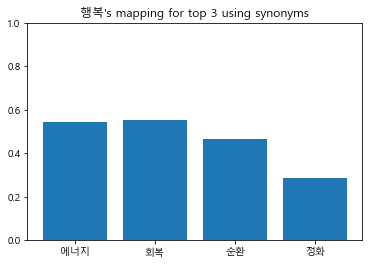

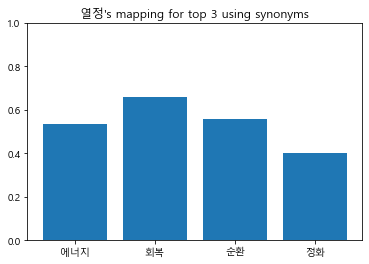

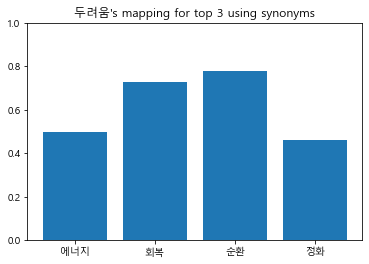

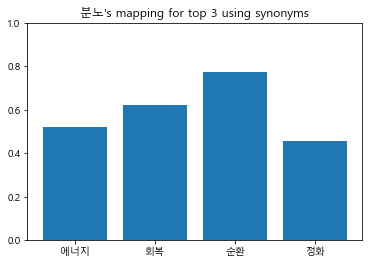

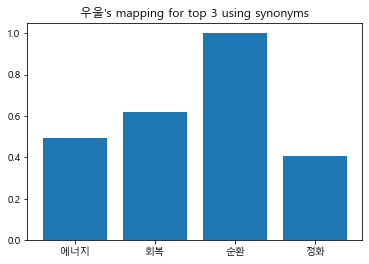

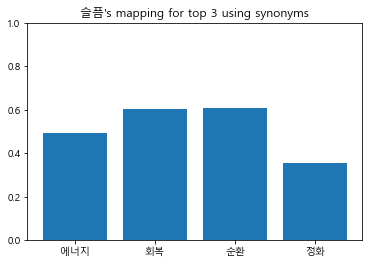

In [24]:
# 이전의 유사도를 기준으로 수치화
tmp = sim_based_maping(data)
for i in range(0,6):
    tmp.result(i,3,True)


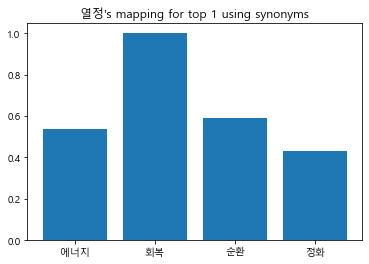

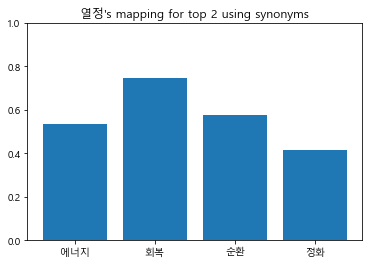

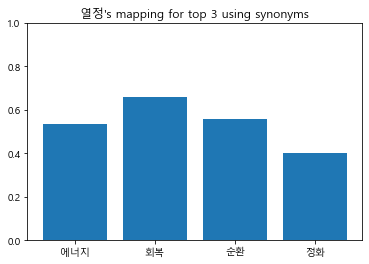

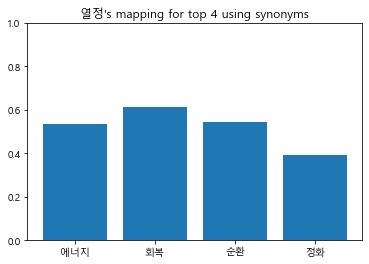

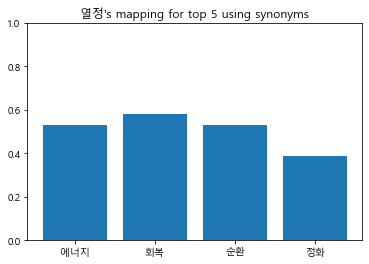

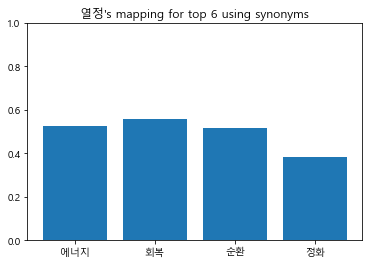

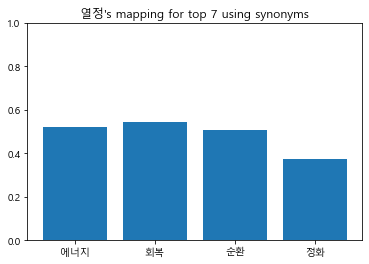

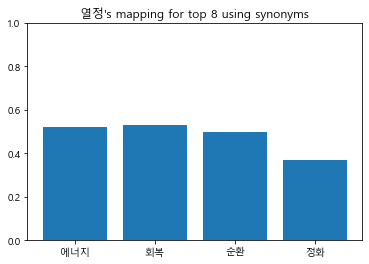

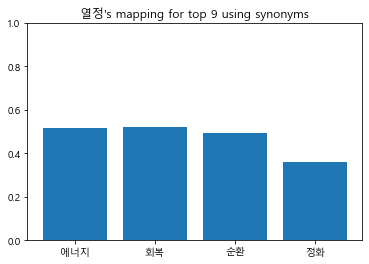

In [28]:
# 상위 몇 개를 기준으로 평균을 내는 것이 좋은가?
for topn in range(1,10):
    tmp.result(1,topn,True)